<a href="https://colab.research.google.com/github/LakshyaSoni11/deep-fake-detector-hub/blob/main/adiVerifiedWorkingIg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y tensorflow keras vit-keras tensorflow-addons
!pip install tensorflow==2.15.0 vit-keras==0.1.2 tensorflow-addons==0.21.0

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: vit-keras 0.1.2
Uninstalling vit-keras-0.1.2:
  Successfully uninstalled vit-keras-0.1.2
Found existing installation: tensorflow-addons 0.21.0
Uninstalling tensorflow-addons-0.21.0:
  Successfully uninstalled tensorflow-addons-0.21.0
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached vit_keras-0.1.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached tensorflow_addons-0.21.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached vit_keras-0.1.2-py3-none-any.whl (

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
from tqdm import tqdm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle as pkl

In [ ]:
def process_videos(video_dir, output_dir, frame_interval=30):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    os.makedirs(output_dir, exist_ok=True)

    for video_file in tqdm(os.listdir(video_dir)):
        if not video_file.lower().endswith(('.mp4', '.avi', '.mov')):
            continue

        video_path = os.path.join(video_dir, video_file)
        cap = cv2.VideoCapture(video_path)
        frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret: break

            if frame_count % frame_interval == 0:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)

                for i, (x,y,w,h) in enumerate(faces):
                    face = frame[y:y+h, x:x+w]
                    output_path = os.path.join(output_dir,
                                             f"{os.path.splitext(video_file)[0]}_f{frame_count}_face{i}.jpg")
                    cv2.imwrite(output_path, face)

            frame_count += 1
        cap.release()

In [ ]:
# Process Celeb Real Videos
process_videos(
    video_dir='/content/drive/MyDrive/Colab Notebooks/Celeb_real_face_only',
    output_dir='/content/drive/MyDrive/Colab Notebooks/Celeb_real_faces'
)

100%|██████████| 588/588 [00:39<00:00, 14.87it/s]


In [ ]:
# Process DFDC Real Videos
process_videos(
    video_dir='/content/drive/MyDrive/Colab Notebooks/DFDC_REAL_Face_only_data',
    output_dir='/content/drive/MyDrive/Colab Notebooks/DFDC_REAL_faces'
)

100%|██████████| 1727/1727 [01:17<00:00, 22.38it/s]


In [ ]:
# Process DFDC Fake Videos
process_videos(
    video_dir='/content/drive/MyDrive/Colab Notebooks/DFDC_FAKE_Face_only_data',
    output_dir='/content/drive/MyDrive/Colab Notebooks/DFDC_FAKE_faces'
)

100%|██████████| 1566/1566 [01:08<00:00, 22.91it/s]


In [ ]:
# Check processed files
!ls "/content/drive/MyDrive/Colab Notebooks/Celeb_real_faces" | head -5
!ls "/content/drive/MyDrive/Colab Notebooks/DFDC_REAL_faces" | head -5
!ls "/content/drive/MyDrive/Colab Notebooks/DFDC_FAKE_faces" | head -5

id0_0004_f0_face0.jpg
id0_0004_f120_face0.jpg
id0_0006_f30_face0.jpg
id0_0007_f30_face0.jpg
id0_0007_f60_face0.jpg
acgzblwsgw_f30_face0.jpg
acgzblwsgw_f60_face0.jpg
acgzblwsgw_f90_face0.jpg
adohdulfwb_f60_face0.jpg
agvtpygfdc_f30_face0.jpg
aabkwhhgwv_f90_face0.jpg
aahsnkchkz_f60_face0.jpg
aakkdgsmvl_f0_face0.jpg
aauhqwwncp_f30_face0.jpg
aawhvztjdt_f0_face0.jpg


In [ ]:
# Configure Paths (AFTER PROCESSING)
base_dir = '/content/drive/MyDrive/Colab Notebooks'
PATHS = {
    'celeb_real': os.path.join(base_dir, 'Celeb_real_faces'),
    'dfdc_real': os.path.join(base_dir, 'DFDC_REAL_faces'),
    'dfdc_fake': os.path.join(base_dir, 'DFDC_FAKE_faces')
}

In [ ]:
!pip uninstall -y numpy  # Remove existing version
!pip install numpy==1.26.4  # Install a version compatible with TensorFlow 2.15.0

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.74 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatibl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from vit_keras import vit
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
# def load_dataset():
#     real_paths = []
#     fake_paths = []

#     # CelebDF Real
#     real_paths += [
#         os.path.join(PATHS['celeb_real'], f)
#         for f in os.listdir(PATHS['celeb_real'])
#         if f.lower().endswith(('.jpg', '.png', '.jpeg'))
#     ]

#     # DFDC Real
#     real_paths += [
#         os.path.join(PATHS['dfdc_real'], f)
#         for f in os.listdir(PATHS['dfdc_real'])
#         if f.lower().endswith(('.jpg', '.png', '.jpeg'))
#     ]

#     # DFDC Fake
#     fake_paths += [
#         os.path.join(PATHS['dfdc_fake'], f)
#         for f in os.listdir(PATHS['dfdc_fake'])
#         if f.lower().endswith(('.jpg', '.png', '.jpeg'))
#     ]

#     df = pd.DataFrame({
#         'path': real_paths + fake_paths,
#         'label': [0]*len(real_paths) + [1]*len(fake_paths)
#     })

#     return df.drop_duplicates().sample(frac=1, random_state=42).reset_index(drop=True)

# df = load_dataset()
# print(f"Loaded {len(df)} samples ({len(df[df.label==0])} real, {len(df[df.label==1])} fake)")

def load_balanced_dataset():
    # Load all available paths
    real_paths = []
    fake_paths = []

    # CelebDF Real
    real_paths += [
        os.path.join(PATHS['celeb_real'], f)
        for f in os.listdir(PATHS['celeb_real'])
        if f.lower().endswith(('.jpg', '.png', '.jpeg'))
    ]

    # DFDC Real
    real_paths += [
        os.path.join(PATHS['dfdc_real'], f)
        for f in os.listdir(PATHS['dfdc_real'])
        if f.lower().endswith(('.jpg', '.png', '.jpeg'))
    ]

    # DFDC Fake
    fake_paths += [
        os.path.join(PATHS['dfdc_fake'], f)
        for f in os.listdir(PATHS['dfdc_fake'])
        if f.lower().endswith(('.jpg', '.png', '.jpeg'))
    ]

    # Create balanced subsets
    real_sample = pd.Series(real_paths).sample(n=369, random_state=42).tolist()
    fake_sample = pd.Series(fake_paths).sample(n=369, random_state=42).tolist()

    # Create balanced DataFrame
    balanced_df = pd.DataFrame({
        'path': real_sample + fake_sample,
        'label': [0]*len(real_sample) + [1]*len(fake_sample)
    })

    return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Load balanced dataset
balanced_df = load_balanced_dataset()
print(f"Loaded {len(balanced_df)} samples ({len(balanced_df[balanced_df.label==0])} real, "
      f"{len(balanced_df[balanced_df.label==1])} fake)")

Loaded 738 samples (369 real, 369 fake)


In [ ]:
def build_vit_model():
    IMG_SIZE = 128  # Keep this consistent everywhere

    vit_model = vit.vit_b16(
        image_size=IMG_SIZE,
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False  # Add this critical parameter
    )

    # Freeze layers (adjusted for b16 architecture)
    for layer in vit_model.layers[:-4]:
        layer.trainable = False

    model = models.Sequential([
        vit_model,
        layers.Dense(64, activation='gelu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])

    # model.compile(
    #     optimizer=tf.keras.optimizers.Adam(3e-4),
    #     loss='binary_crossentropy',
    #     metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    # )

    def focal_loss(gamma=2., alpha=0.75):
        def loss(y_true, y_pred):
          bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
          bce_exp = tf.exp(-bce)
          return alpha * (1 - bce_exp) ** gamma * bce
        return loss

    model.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2., alpha=0.75),  # ✅ focal loss here
    metrics=['accuracy', tf.keras.metrics.AUC()]
    )

    return model

In [ ]:
model = build_vit_model()
model.summary()  # Verify input shape: (None, 128, 128, 3)

/usr/local/lib/python3.11/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 8, 8
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85697280  
                                                                 
 dense_2 (Dense)             (None, 64)                49216     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 85746561 (327.10 MB)
Trainable params: 14226561 (54.27 MB)
Non-trainable params: 71520000 (272.83 MB)
_________________________________________________________________


In [ ]:
def create_generators(df):
    IMG_SIZE = 128
    BATCH_SIZE = 128

    # First split the DataFrame properly
    train_df = df.sample(frac=0.8, random_state=42)
    val_df = df.drop(train_df.index)

    # Training generator
    train_datagen = ImageDataGenerator(
        preprocessing_function=lambda x: x/127.5 - 1.0,
        horizontal_flip=True
    )
    train_gen = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='label',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='raw'
    )

    # Validation generator
    val_datagen = ImageDataGenerator(
        preprocessing_function=lambda x: x/127.5 - 1.0
    )
    val_gen = val_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='label',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE*2,
        class_mode='raw'
    )

    return train_gen, val_gen

In [ ]:
train_gen, val_gen = create_generators(df)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=2,
            mode='max',
            restore_best_weights=True
        )
    ],
    verbose=1
)


Found 1014 validated image filenames.
Found 253 validated image filenames.
Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.5720 - auc_1: 0.4952 

8/8 [==============================] - 412s 52s/step - loss: 0.3267 - accuracy: 0.5720 - auc_1: 0.4952 - val_loss: 0.1200 - val_accuracy: 0.6957 - val_auc_1: 0.6503
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.1028 - accuracy: 0.7367 - auc_1: 0.7272 

8/8 [==============================] - 367s 47s/step - loss: 0.1028 - accuracy: 0.7367 - auc_1: 0.7272 - val_loss: 0.1212 - val_accuracy: 0.7233 - val_auc_1: 0.7930
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.7742 - auc_1: 0.8064 

8/8 [==============================] - 368s 47s/step - loss: 0.0904 - accuracy: 0.7742 - auc_1: 0.8064 - val_loss: 0.0994 - val_accuracy: 0.7708 - val_auc_1: 0.8395
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.8067 - auc_1: 0.8748 

8/8 [==============================] - 367s 47s/step - loss: 0.0764 - accuracy: 0.8067 - auc_1: 0.8748 - val_loss: 0.0788 - val_accuracy: 0.8182 - val_auc_1: 0.8794
Epoch 5/5
8/8 [==============================] - ETA: 0s - loss: 0.0718 - accuracy: 0.8235 - auc_1: 0.8919 

8/8 [==============================] - 364s 46s/step - loss: 0.0718 - accuracy: 0.8235 - auc_1: 0.8919 - val_loss: 0.0701 - val_accuracy: 0.8261 - val_auc_1: 0.9037


In [ ]:
model.save('/content/vit_deepfake_detector.keras')

In [ ]:
model.save('/content/vit_deepfake_detector.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/vit_deepfake_detector.keras')

In [ ]:
model.save('/content/drive/MyDrive/vit_deepfake_detector1.h5')

In [ ]:
# 5. Prediction Function (Optimized)
def predict_video(video_path, frame_skip=10):
    """
    Args:
        video_path: Path to video file
        frame_skip: Process every nth frame (higher=faster)
    Returns:
        Prediction string with confidence
    """
    face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    )

    cap = cv2.VideoCapture(video_path)
    predictions = []

    while cap.isOpened():
        # Skip frames for faster processing
        for _ in range(frame_skip-1):
            cap.grab()

        ret, frame = cap.read()
        if not ret:
            break

        # Face detection and preprocessing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            try:
                face = cv2.resize(frame[y:y+h, x:x+w], (128, 128))  # Match model input size
                face = (face / 127.5) - 1.0  # Same as training preprocessing
                pred = model.predict(face[np.newaxis, ...], verbose=0)[0][0]
                predictions.append(pred)
            except Exception as e:
                continue

    cap.release()

    if not predictions:
        return "No faces detected in video"

    avg_pred = np.mean(predictions)
    confidence = avg_pred if avg_pred > 0.5 else 1 - avg_pred
    return f"Prediction: {'FAKE' if avg_pred > 0.5 else 'REAL'} (Confidence: {confidence*100:.1f}%)"

# 6. Upload and Test Video
print("Upload a video file for analysis:")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\nAnalyzing {filename}...")
    print(predict_video(filename))
    print("-" * 50)

Upload a video file for analysis:


+train_gen, val_gen = create_generators(df)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=5,
            mode='max',
            restore_best_weights=True
        )
    ]
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get true labels and predicted probabilities
y_true = val_gen.labels  # Ground truth labels
y_pred_probs = model.predict(val_gen, verbose=0).flatten()  # Predicted probabilities

# Convert probabilities to binary predictions (threshold=0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5889
Precision: 0.3200
Recall: 0.3117
F1 Score: 0.3158


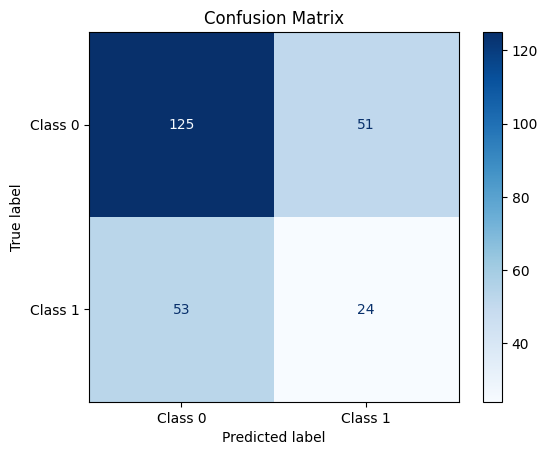

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_true and y_pred already exist
# (i.e., from earlier: val_gen.labels and model.predict(...) > 0.5)

# 1. Get predictions as binary values (already done):
# y_pred = model.predict(val_gen, verbose=0) > 0.5

# 2. Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 3. Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
